<a href="https://colab.research.google.com/github/mioyn/AdvDataProg/blob/main/Lung_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Lung Cancer Prediction

In [1]:

! pip install scikit-learn
! pip install Pandas

In [2]:
from sklearn import datasets    #  Skelearn Library for machine learning
from sklearn.preprocessing import LabelEncoder
import pandas as pd             # importing the pandas library for data managing
import numpy as np              # for computational processes
import matplotlib.pyplot as plt # for visualisation
import seaborn as sns
from google.colab import drive

In [3]:
# @title Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
df=pd.read_csv('/content/drive/MyDrive/datasets/Lung Cancer Dataset.csv')
df.info()

df.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   AGE                     5000 non-null   int64  
 1   GENDER                  5000 non-null   int64  
 2   SMOKING                 5000 non-null   int64  
 3   FINGER_DISCOLORATION    5000 non-null   int64  
 4   MENTAL_STRESS           5000 non-null   int64  
 5   EXPOSURE_TO_POLLUTION   5000 non-null   int64  
 6   LONG_TERM_ILLNESS       5000 non-null   int64  
 7   ENERGY_LEVEL            5000 non-null   float64
 8   IMMUNE_WEAKNESS         5000 non-null   int64  
 9   BREATHING_ISSUE         5000 non-null   int64  
 10  ALCOHOL_CONSUMPTION     5000 non-null   int64  
 11  THROAT_DISCOMFORT       5000 non-null   int64  
 12  OXYGEN_SATURATION       5000 non-null   float64
 13  CHEST_TIGHTNESS         5000 non-null   int64  
 14  FAMILY_HISTORY          5000 non-null   

,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE,PULMONARY_DISEASE
0,68,1,1,1,1,1,0,57.831178,0,0,1,1,95.977287,1,0,0,0,NO
1,81,1,1,0,0,1,1,47.694835,1,1,0,1,97.184483,0,0,0,0,YES
2,58,1,1,0,0,0,0,59.577435,0,1,1,0,94.974939,0,0,0,0,NO
3,44,0,1,0,1,1,0,59.785767,0,1,0,1,95.187900,0,0,0,0,YES
4,72,0,1,1,1,1,1,59.733941,0,1,0,1,93.503008,0,0,0,0,YES
5,37,1,1,1,1,1,1,57.684285,0,1,1,1,94.057151,1,0,0,0,YES
6,50,0,1,1,1,0,1,52.647022,1,1,1,0,96.773598,0,0,0,1,NO
7,68,0,1,1,1,0,1,53.306451,0,0,0,1,95.019018,0,0,0,0,NO
8,48,0,1,1,0,1,1,64.272789,1,1,0,1,98.539379,1,0,0,0,YES
9,52,0,0,0,1,1,1,58.319319,0,1,0,1,96.055097,0,0,0,0,NO


In [5]:
df.isnull().sum()

,0
AGE,0
GENDER,0
SMOKING,0
FINGER_DISCOLORATION,0
MENTAL_STRESS,0
EXPOSURE_TO_POLLUTION,0
LONG_TERM_ILLNESS,0
ENERGY_LEVEL,0
IMMUNE_WEAKNESS,0
BREATHING_ISSUE,0


In [16]:
df_encoded = df.copy()
label_encoders = {}
for column in df_encoded.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df_encoded[column] = label_encoders[column].fit_transform(df_encoded[column])

In [17]:
df_encoded.head(5)

,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE,PULMONARY_DISEASE
0,68,1,1,1,1,1,0,57.831178,0,0,1,1,95.977287,1,0,0,0,0
1,81,1,1,0,0,1,1,47.694835,1,1,0,1,97.184483,0,0,0,0,1
2,58,1,1,0,0,0,0,59.577435,0,1,1,0,94.974939,0,0,0,0,0
3,44,0,1,0,1,1,0,59.785767,0,1,0,1,95.187900,0,0,0,0,1
4,72,0,1,1,1,1,1,59.733941,0,1,0,1,93.503008,0,0,0,0,1


In [18]:
df_encoded=df_encoded.drop(['MENTAL_STRESS'], axis=1)
df_encoded=df_encoded.drop(['LONG_TERM_ILLNESS'], axis=1)
df_encoded=df_encoded.drop(['STRESS_IMMUNE'], axis=1)
df_encoded=df_encoded.drop(['ENERGY_LEVEL'], axis=1)
df_encoded=df_encoded.drop(['BREATHING_ISSUE'], axis=1)
df_encoded=df_encoded.drop(['IMMUNE_WEAKNESS'], axis=1)

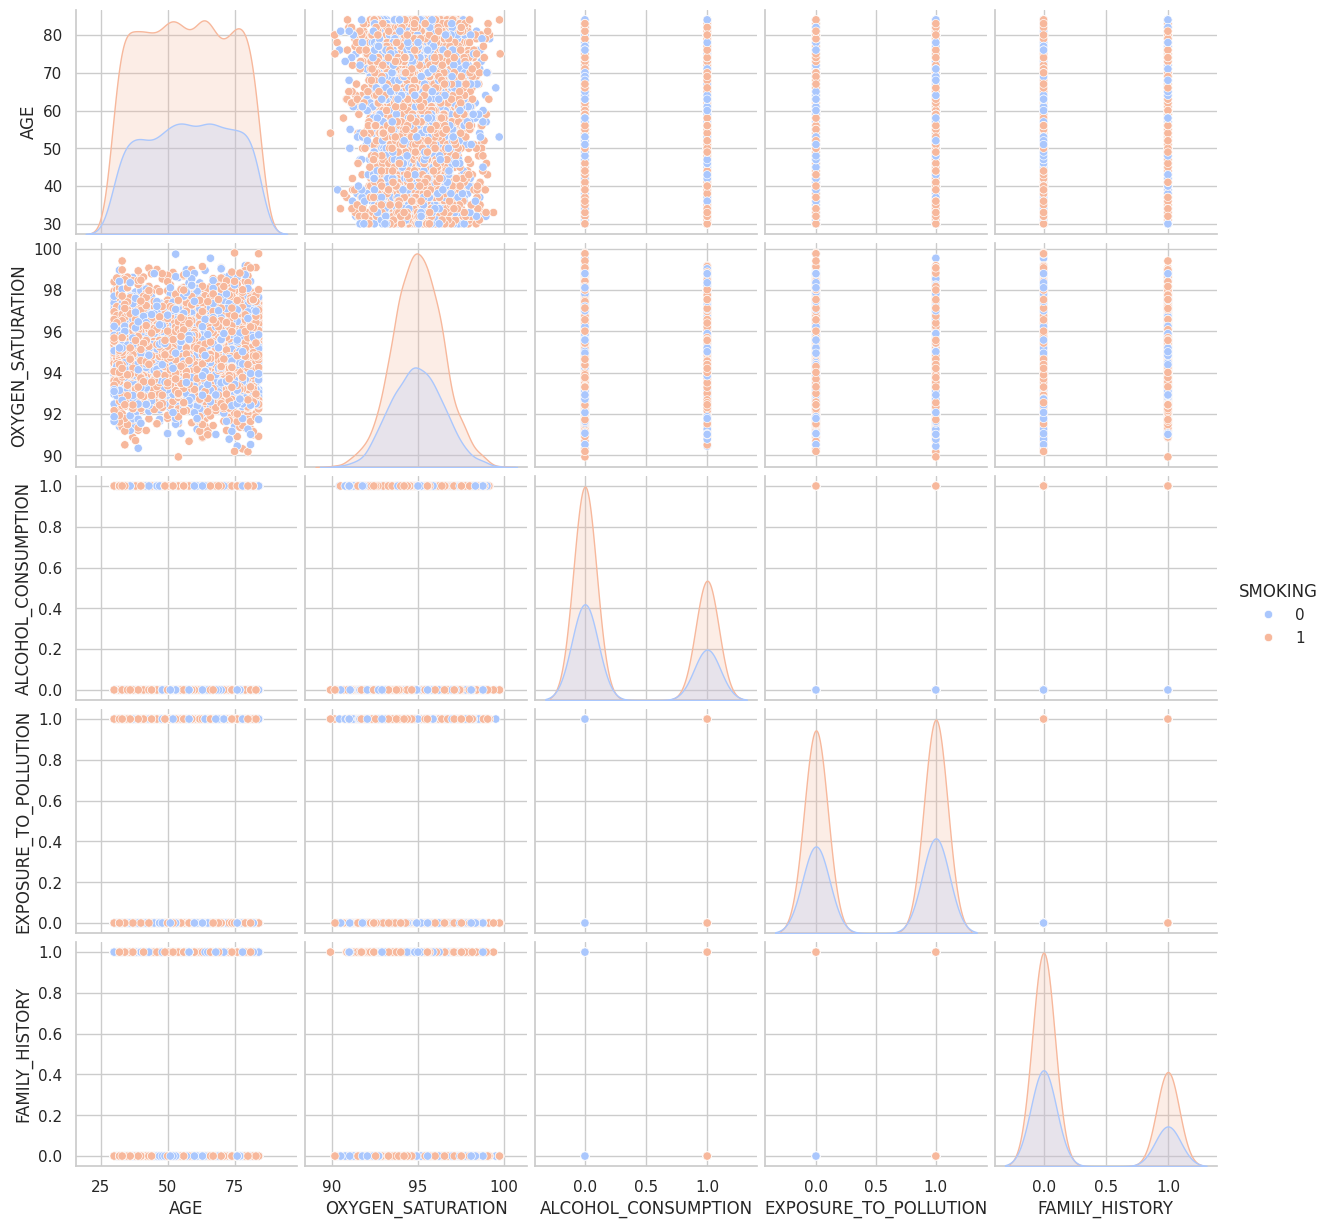

In [47]:
# Set Seaborn style
sns.set(style="whitegrid")


# Convert categorical variables to numerical using Label Encoding
df_encoded_pairplot = df.copy()
#for column in ['SMOKING', 'ALCOHOL_CONSUMPTION', 'EXPOSURE_TO_POLLUTION', 'FAMILY_HISTORY']:
#    df_encoded_pairplot[column] = LabelEncoder().fit_transform(df_encoded_pairplot[column])

# Select only numerical features
selected_features = ["AGE", "OXYGEN_SATURATION", "SMOKING", "ALCOHOL_CONSUMPTION", "EXPOSURE_TO_POLLUTION", "FAMILY_HISTORY"]

# Ensure all selected features are numeric
df_numeric = df_encoded_pairplot[selected_features]

# Pairplot (hue must be categorical)
sns.pairplot(df_numeric, hue="SMOKING", palette="coolwarm")
plt.show()

In [20]:
# @title Remove target
df_data = df_encoded.drop(['PULMONARY_DISEASE'], axis=1)
df_target = df_encoded['PULMONARY_DISEASE']

In [21]:
df_target.tail(5)

,PULMONARY_DISEASE
4995,1
4996,1
4997,0
4998,0
4999,0


In [37]:
from sklearn.neighbors import KNeighborsClassifier
# First step: creat model
knn = KNeighborsClassifier(n_neighbors=33, metric='minkowski',p=2) # creat model because P= 2 then the method for distance calculation is Euclidiean Method
x = df_data
y = df_target
knn.fit(x, y) # Second step:Fitting the model

KNeighborsClassifier(n_neighbors=33)

In [48]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_data, df_target, test_size=0.2, stratify=df_target, random_state=42)

knn = KNeighborsClassifier(n_neighbors=33, metric='minkowski',p=2) # creat model because P= 2 then the method for distance calculation is Euclidiean Method
knn.fit(x_train, y_train) # fitting the model based on the train samples
y_predict = knn.predict(x_test) # predict model based on test sample
y_predict # showing the labels of test data

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,

In [49]:
x_train.shape

(4000, 11)

In [50]:
x_test.shape

(1000, 11)

In [51]:
knn.predict([df_data.loc[6].values])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])

In [52]:
df.loc[6]

,6
AGE,50
GENDER,0
SMOKING,1
FINGER_DISCOLORATION,1
MENTAL_STRESS,1
EXPOSURE_TO_POLLUTION,0
LONG_TERM_ILLNESS,1
ENERGY_LEVEL,52.647022
IMMUNE_WEAKNESS,1
BREATHING_ISSUE,1


In [53]:
knn.predict([df_data.loc[5].values])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1])

In [54]:
df.loc[5]

,5
AGE,37
GENDER,1
SMOKING,1
FINGER_DISCOLORATION,1
MENTAL_STRESS,1
EXPOSURE_TO_POLLUTION,1
LONG_TERM_ILLNESS,1
ENERGY_LEVEL,57.684285
IMMUNE_WEAKNESS,0
BREATHING_ISSUE,1


In [55]:
knn.score(x_train,y_train)

0.74475

In [56]:
knn.score(x_test, y_test)

0.691

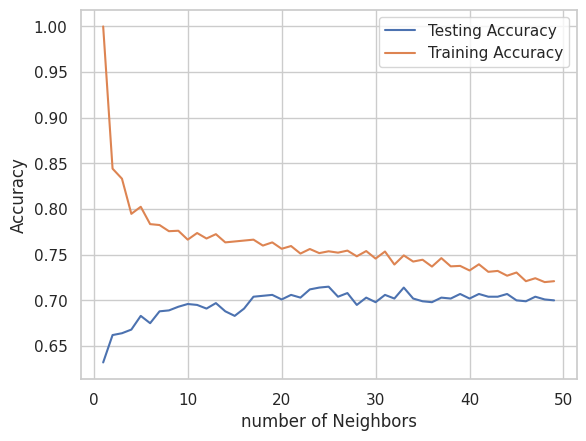

In [36]:
neighbors = np.arange(1, 50)

train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
  knn_model = KNeighborsClassifier(n_neighbors=k)
  knn_model.fit(x_train, y_train)
  train_accuracy[i] = knn_model.score(x_train, y_train)
  test_accuracy[i] = knn_model.score(x_test, y_test)

plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('number of Neighbors')
plt.ylabel('Accuracy')
plt.show()